**В машинном обучении и в этом ноутбуке мы часто используем библиотеку Scikit-learn.**

<a href="https://pycaret.org/" target="_blank"><img src="https://hands-on.cloud/wp-content/uploads/2022/05/How-to-use-PyCaret-in-Python-for-Machine-Learning.png" border="0" alt="" /></a>

### **Для чего используется PyCaret?**

 PyCaret – библиотеку машинного обучения с открытым исходным кодом на Python для обучения и развертывания моделей с учителем и без учителя в low-code среде. PyCaret позволит вам пройти путь от подготовки данных до развертывания модели за несколько секунд в той notebook-среде, которую вы выберете.



In [ ]:
!pip install pycaret

# 📤 Импорт и установка библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

# 💾 Загрузка данных

В данном занятии мы будем работать с предзагруженным набором данных 'insurance' — пример для задач регрессии. Он содержит данные о страховании медицинских расходов. Чаще всего его используют для предсказания затрат на медицинское страхование (колонка charges) на основе следующих характеристик:

In [ ]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


```
age: Возраст человека (числовой).
sex: Пол (male, female).
bmi: Индекс массы тела (числовой).
children: Количество детей или иждивенцев (целочисленный).
smoker: Является ли человек курильщиком (yes, no).
region: Регион проживания (northeast, northwest, southeast, southwest).
charges: Стоимость медицинского страхования (целевая переменная для задач регрессии).
```



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 📊 Исследовательский анализ данных (EDA)

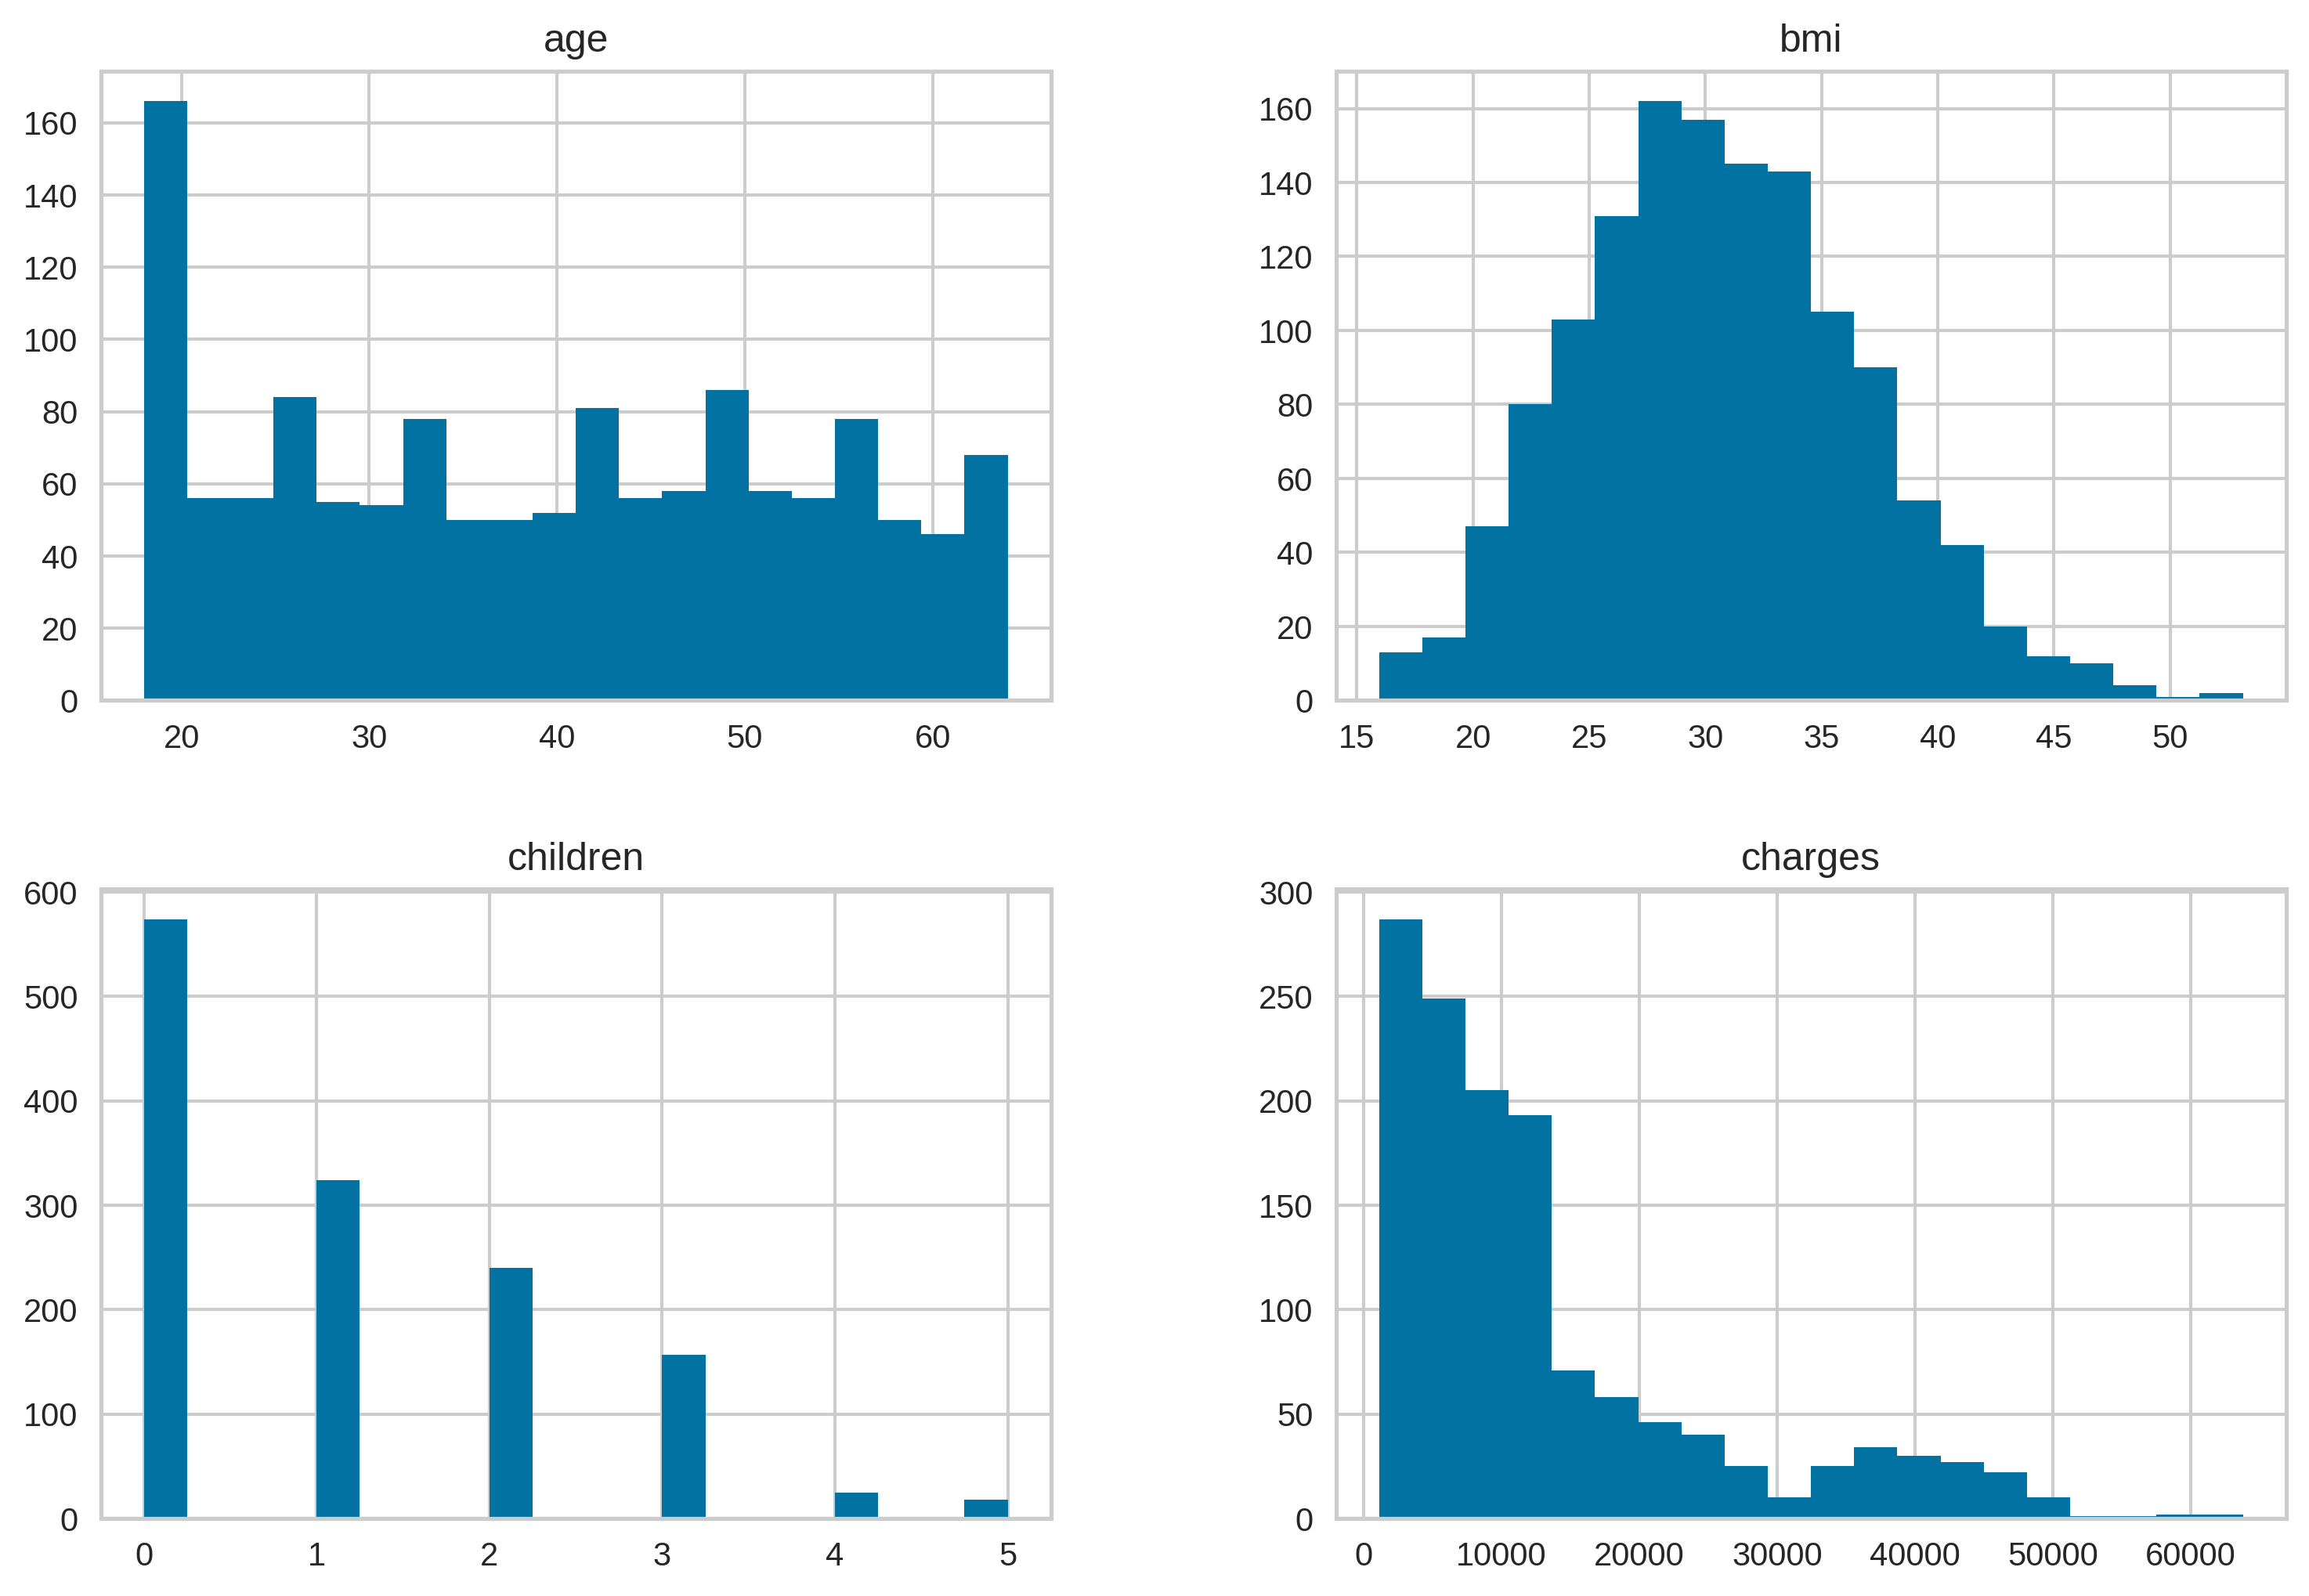

In [ ]:
numeric = ['age', 'bmi', 'children', 'charges']

data[numeric].hist(bins=20, figsize = (12,8))
plt.show()

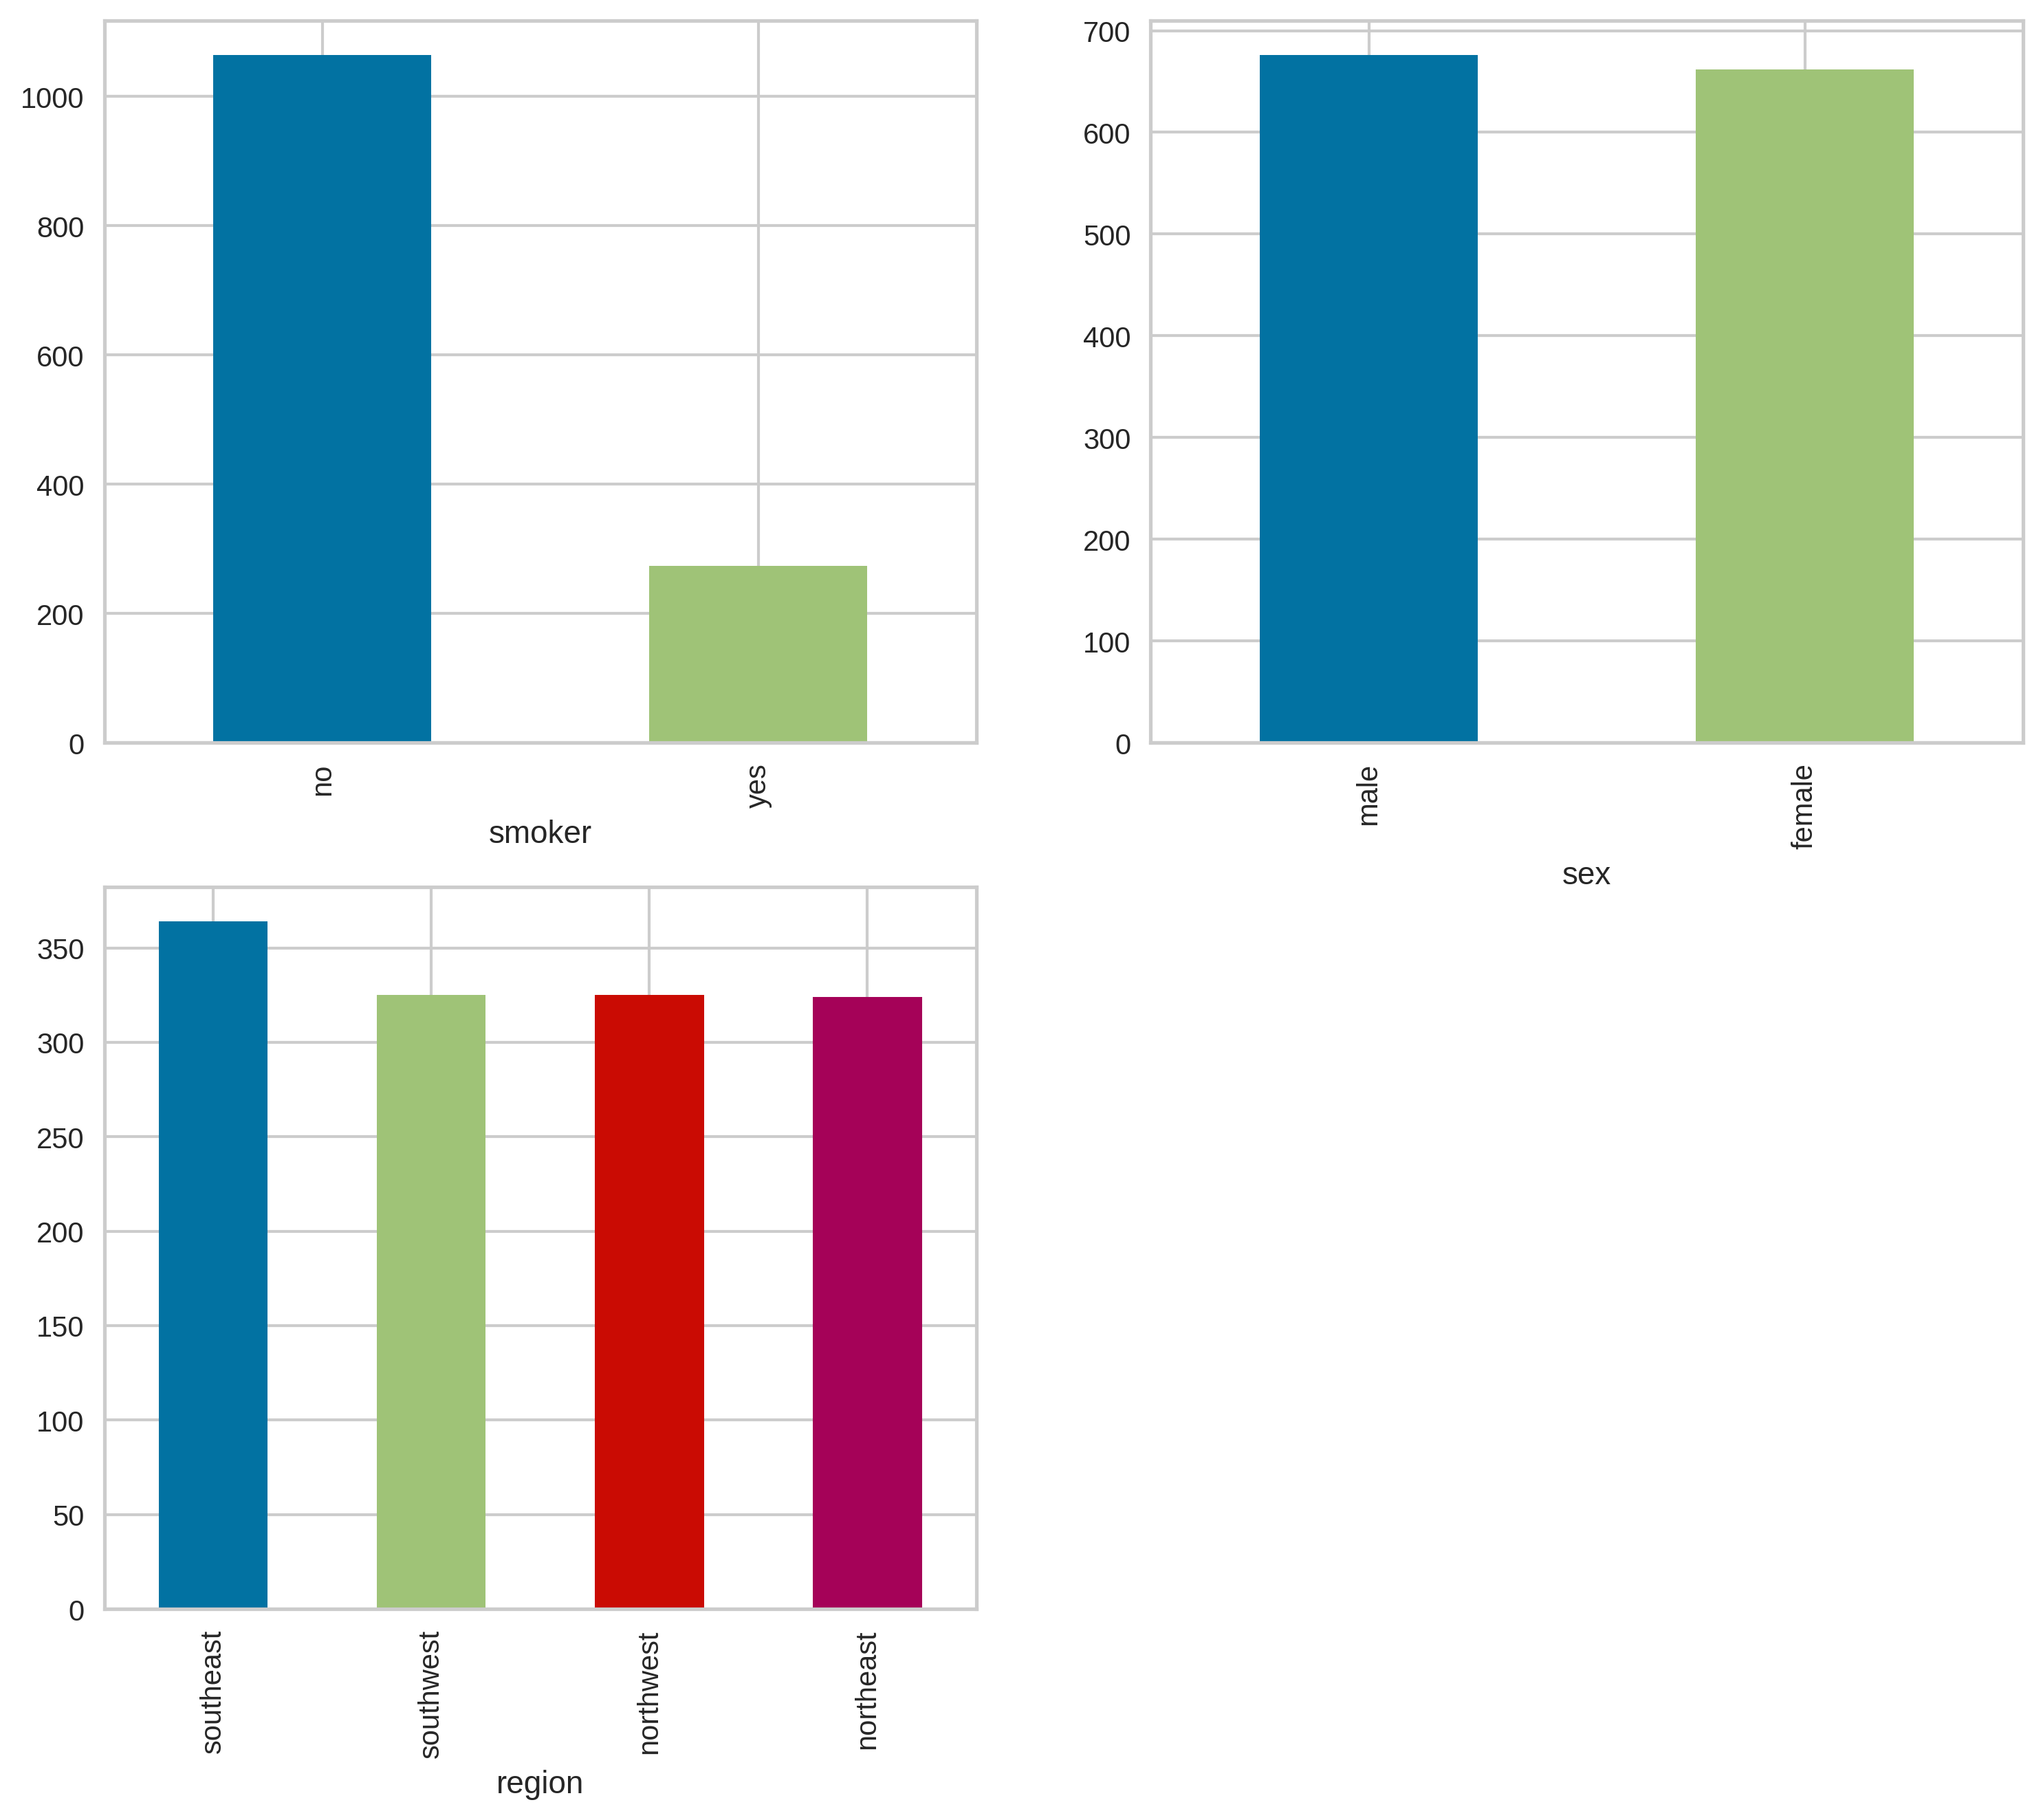

In [ ]:
categorical = ['smoker', 'sex', 'region']
color = ['C0', 'C1', 'C2', 'C3']

fig, axes = plt.subplots(2, 2, figsize = (12,10))
axes[1,1].set_axis_off()

for ax, col in zip(axes.flatten(), categorical) :
    data[col].value_counts().plot(kind = 'bar', ax = ax, color = color)
    ax.set_xlabel(col)



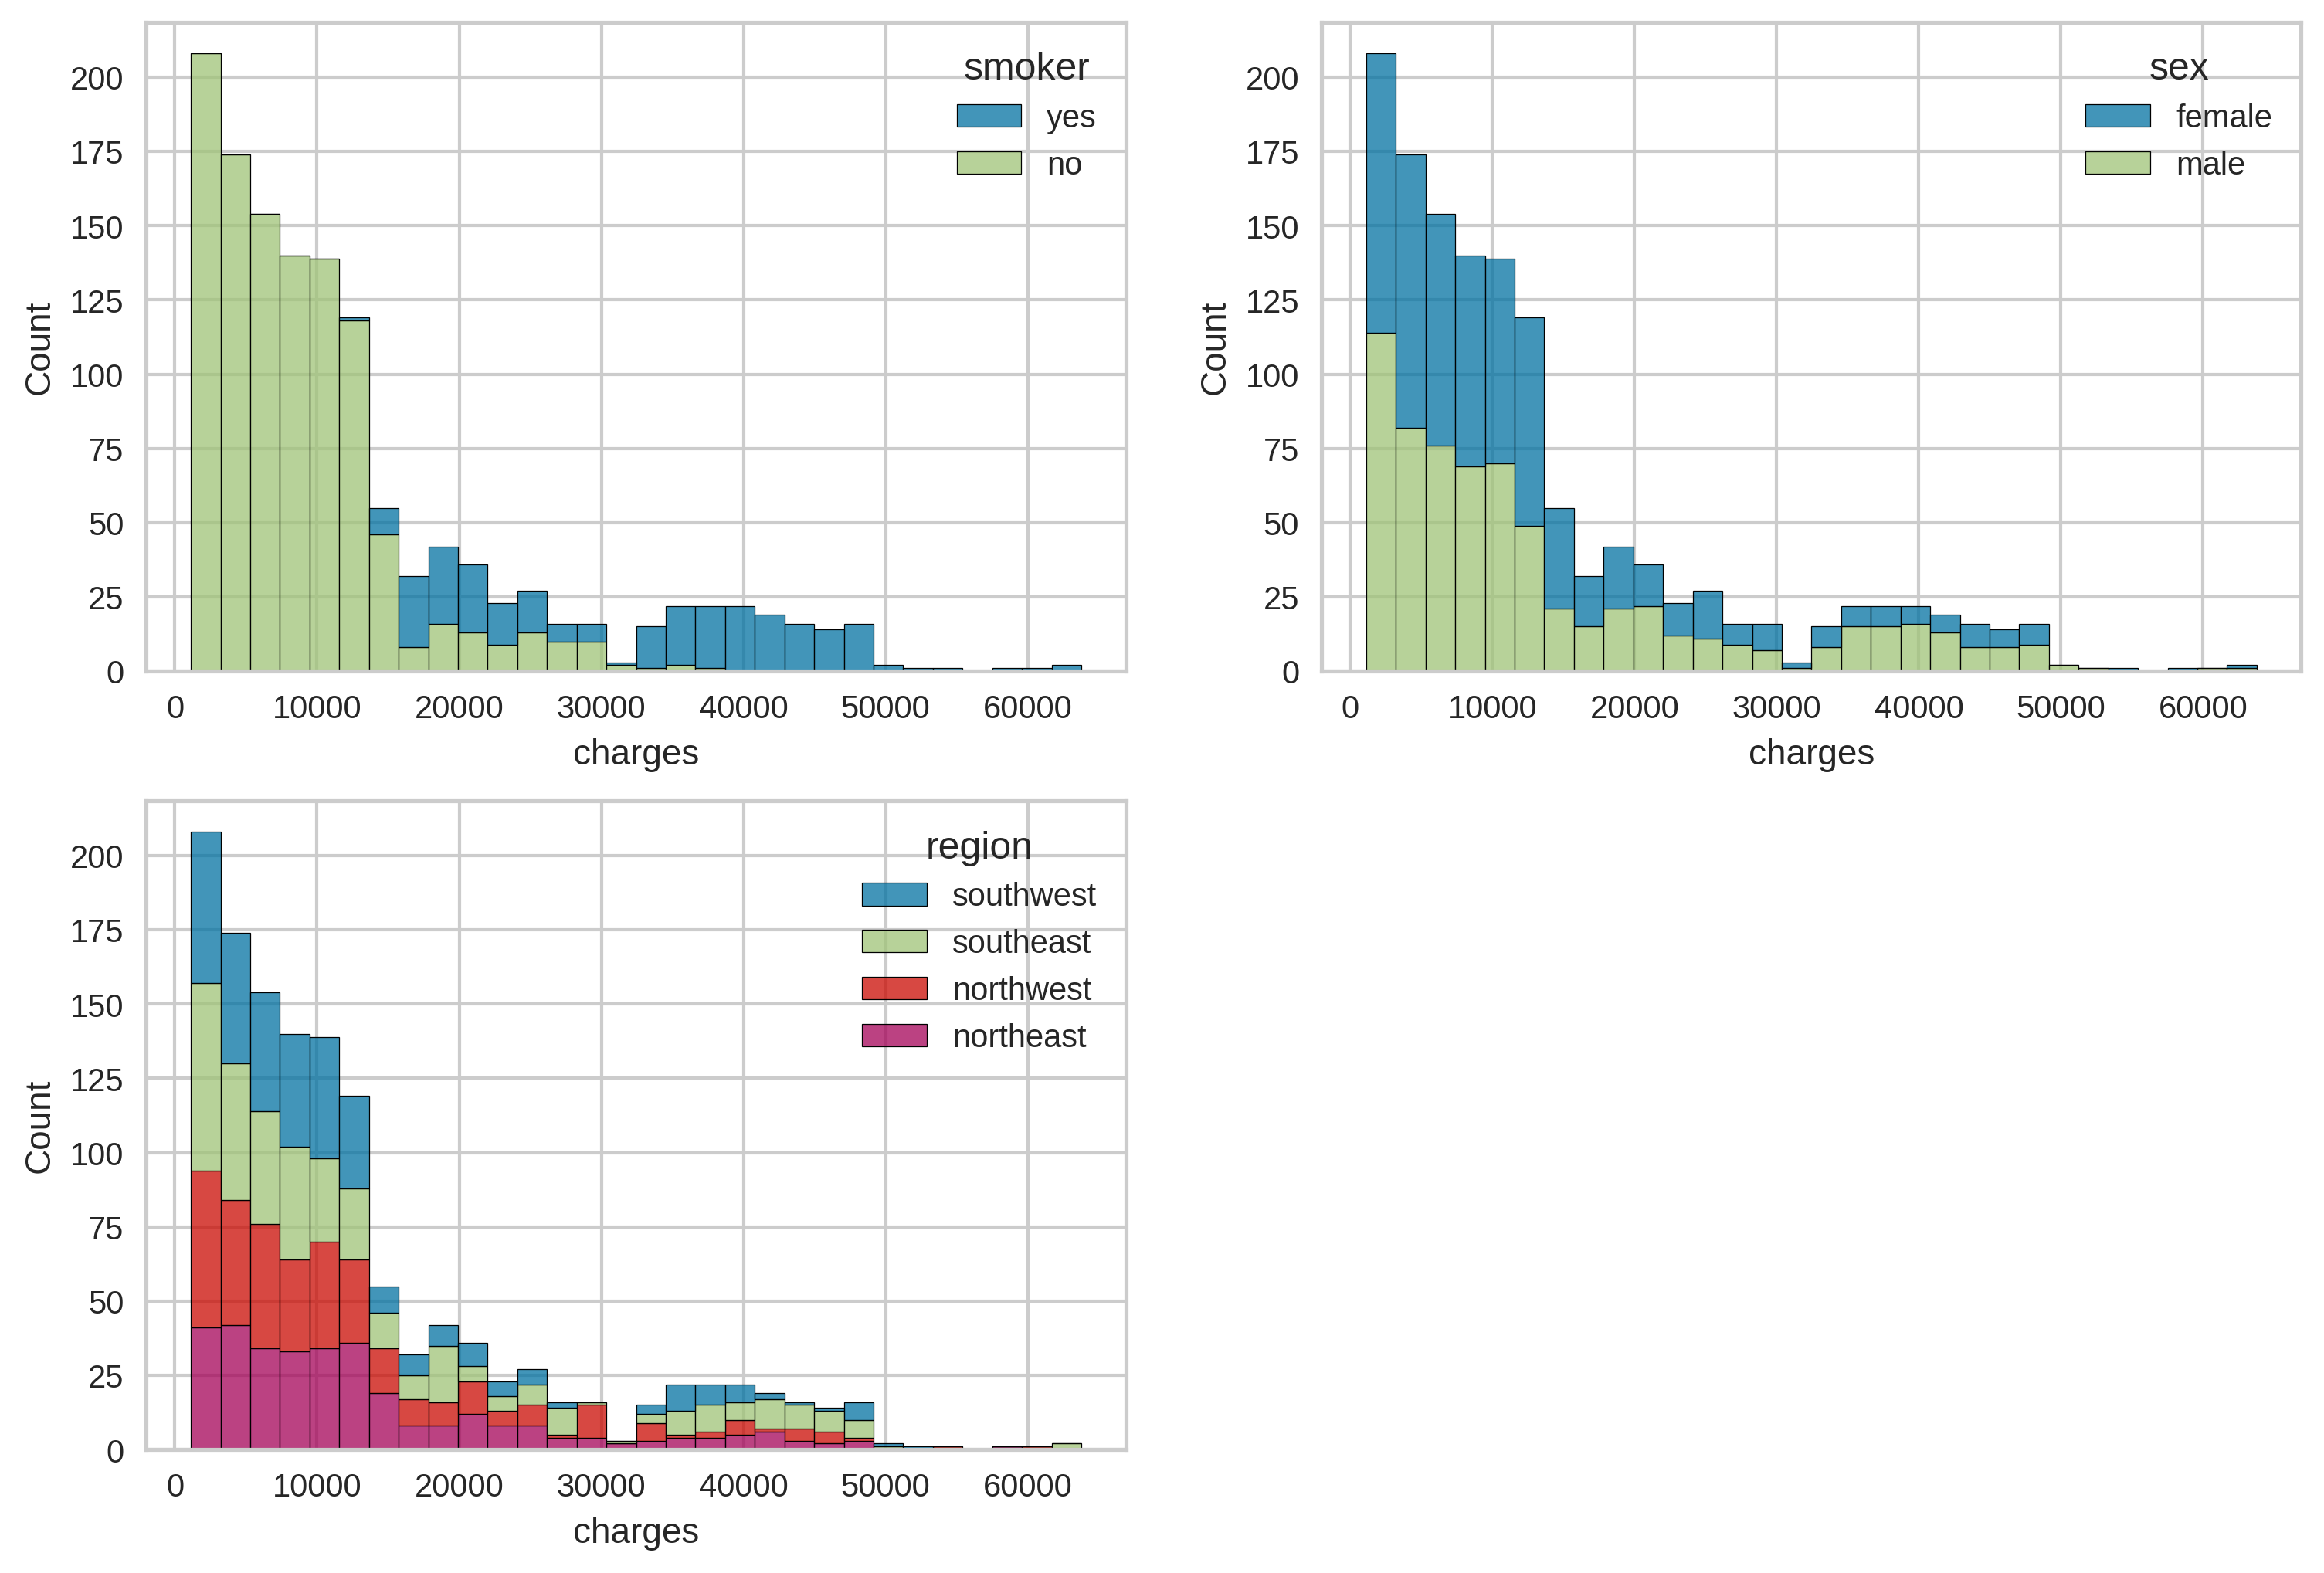

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes[1,1].set_axis_off()

for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data, x='charges', hue=col, multiple='stack', ax=ax)

# Инициализация среды PyCaret

In [ ]:
reg = setup(data=data, target='charges', train_size = 0.8, session_id = 7402,
            numeric_features = numeric[:-1], categorical_features = categorical,
            transformation = True, normalize = True)

,Description,Value
0,Session id,7402
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [ ]:
get_config('X_transformed').head()

,age,sex,bmi,children,smoker,region_northeast,region_southwest,region_southeast,region_northwest
989,-1.101651,-1.032297,-1.773173,-1.080649,2.017694,1.747292,-0.553599,-0.616964,-0.566558
734,1.359932,-1.032297,0.282258,1.358853,-0.495615,-0.572314,1.806363,-0.616964,-0.566558
790,0.038240,-1.032297,1.692765,-1.080649,-0.495615,-0.572314,-0.553599,1.620839,-0.566558
1025,-1.353821,-1.032297,0.666971,-1.080649,-0.495615,-0.572314,1.806363,-0.616964,-0.566558
1209,1.359932,0.968713,1.036003,0.290510,-0.495615,-0.572314,1.806363,-0.616964,-0.566558


# Сравнение регрессионных моделей

In [ ]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2653.5705,22788369.3808,4750.3269,0.8355,0.4412,0.3166,0.3760
rf,Random Forest Regressor,2843.6511,25287914.2960,5004.8833,0.8187,0.4733,0.3391,0.8590
lightgbm,Light Gradient Boosting Machine,2972.2371,25556924.9920,5025.8170,0.8162,0.5444,0.3707,0.4050
et,Extra Trees Regressor,2756.0313,26963644.8414,5167.8475,0.8046,0.4776,0.3152,0.3800
ada,AdaBoost Regressor,4171.4930,27224245.1707,5196.6607,0.8045,0.6046,0.6883,0.1380
xgboost,Extreme Gradient Boosting,3223.8352,30431894.6000,5494.1843,0.7774,0.5689,0.4211,0.2450
knn,K Neighbors Regressor,3533.1890,31952929.8000,5631.9931,0.7702,0.4994,0.3839,0.1270
llar,Lasso Least Angle Regression,4264.9301,37679182.0798,6127.1917,0.7279,0.6161,0.4359,0.1200
lasso,Lasso Regression,4264.9304,37679195.3633,6127.1927,0.7279,0.6161,0.4359,0.1220
ridge,Ridge Regression,4266.4851,37679214.7628,6127.2099,0.7279,0.6258,0.4362,0.1690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Создание модели

In [ ]:
model = create_model('gbr', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2768.2676,24841179.1229,4984.0926,0.8378,0.4195,0.2882
1,2940.4457,28315108.4822,5321.1943,0.7484,0.5487,0.4752
2,2993.9150,23821042.4759,4880.6805,0.8432,0.4964,0.3497
3,2654.7213,23770948.5261,4875.5460,0.8282,0.4335,0.2721
4,2662.8865,19474033.9767,4412.9394,0.8280,0.4790,0.3527
5,2195.2128,17621107.6390,4197.7503,0.9046,0.3352,0.2430
6,3046.0217,30885275.2015,5557.4522,0.8275,0.4624,0.3248
7,2330.4229,16496535.3129,4061.5927,0.8925,0.3726,0.2909
8,2314.7058,18220251.7507,4268.5187,0.8193,0.4014,0.3016


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Настройка модели

In [ ]:
params = {
        'learning_rate': [0.05, 0.08, 0.1],
        'max_depth': [1,2, 3, 4, 5, 6, 7, 8],
        'subsample': [0.8, 0.9, 1, 1.1],
        'n_estimators' : [100, 200, 300, 400, 500]
    }

tuned_model = tune_model(model, optimize = 'RMSE', fold = 10,
                       custom_grid = params, n_iter = 100)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:29:30
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2667.7826,22946481.7490,4790.2486,0.8502,0.3926,0.2741
1,2888.3506,27326804.4411,5227.5046,0.7572,0.5226,0.4341
2,2757.3939,20046226.0602,4477.3012,0.8681,0.4488,0.3000
3,2654.4832,22061272.1066,4696.9428,0.8405,0.4249,0.2690
4,2610.7305,18156336.6083,4261.0253,0.8396,0.4409,0.3291
5,2275.6820,17020488.4047,4125.5895,0.9078,0.3359,0.2557
6,2813.1648,28955666.6040,5381.0470,0.8382,0.4489,0.2949
7,2319.5034,16462516.3817,4057.4027,0.8927,0.3677,0.2880
8,2322.4547,17375242.2944,4168.3621,0.8277,0.3870,0.2993


# Предсказание модели

In [ ]:
predictions = predict_model(model)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2376.9528,17261534.3479,4154.7003,0.8892,0.4092,0.3059


,age,sex,bmi,children,smoker,region,charges,prediction_label
1004,47,male,19.190001,1,no,northeast,8627.541016,9198.764395
763,27,male,26.030001,0,no,northeast,3070.808594,4970.680556
544,54,male,30.209999,0,no,northwest,10231.500000,12877.941318
256,56,male,33.630001,0,yes,northwest,43921.183594,43921.188119
1171,43,female,26.700001,2,yes,southwest,22478.599609,24340.099972


# Графики модели

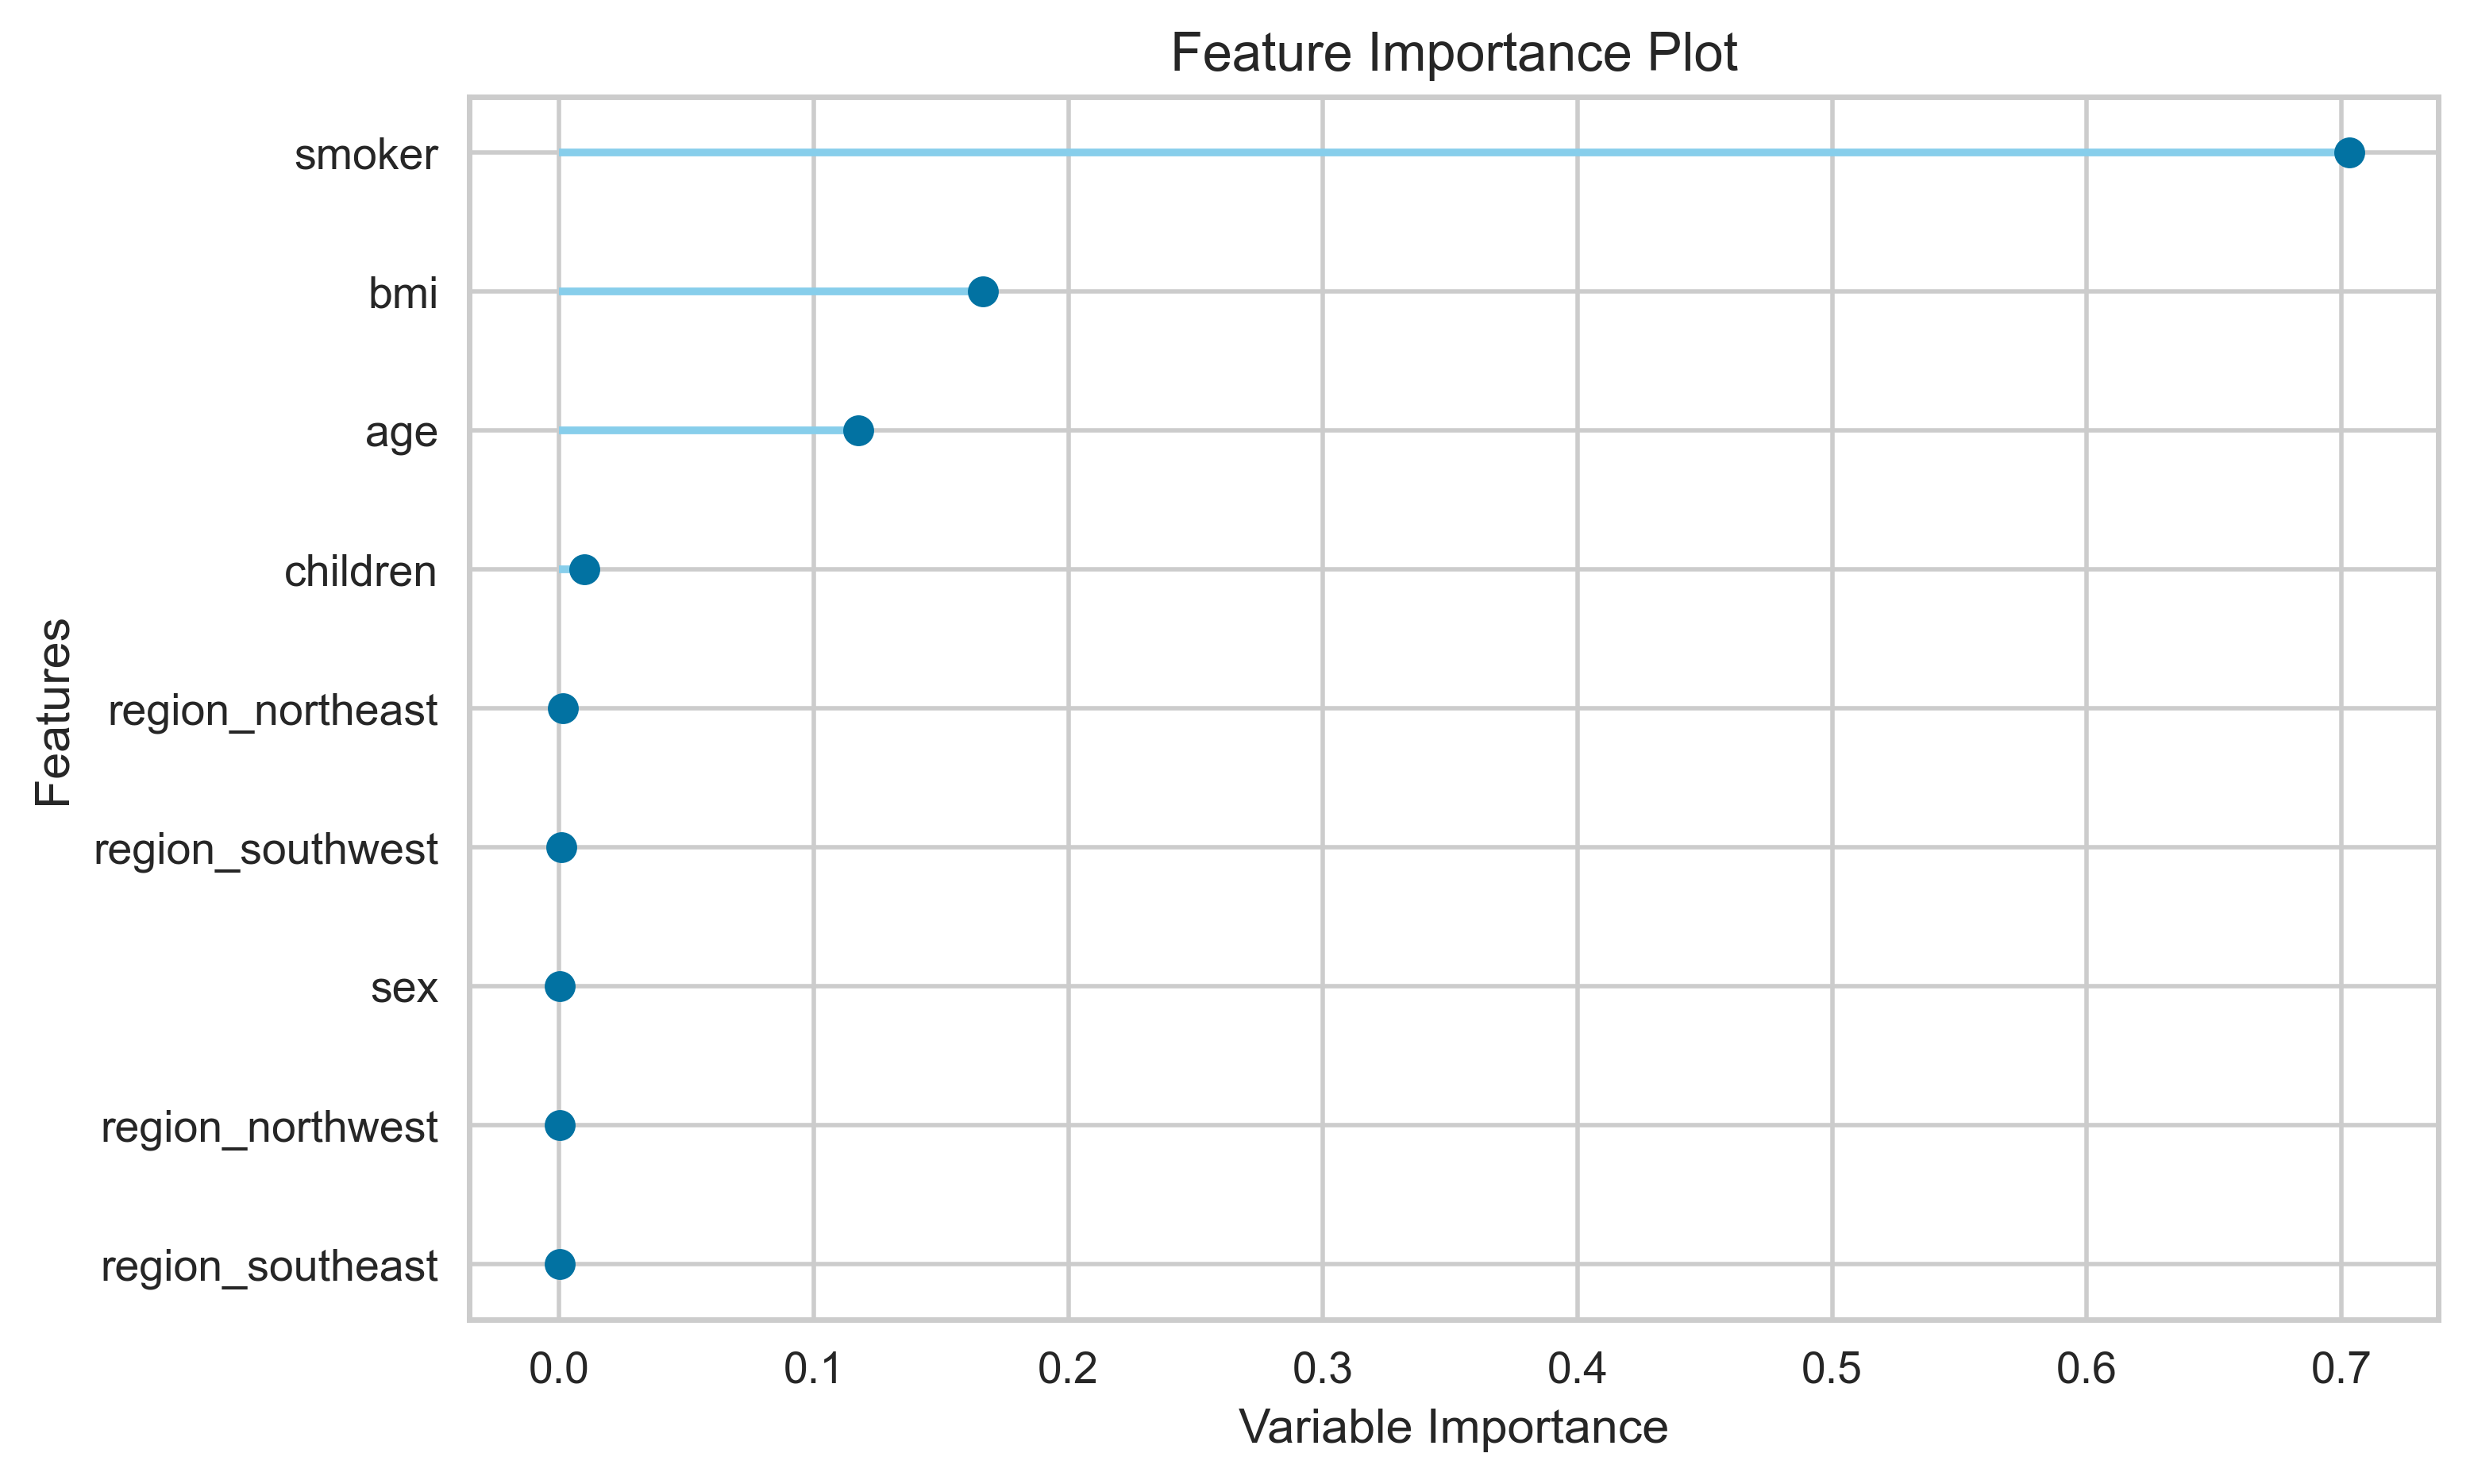

In [ ]:
plot_model(tuned_model, 'feature', scale = 4)

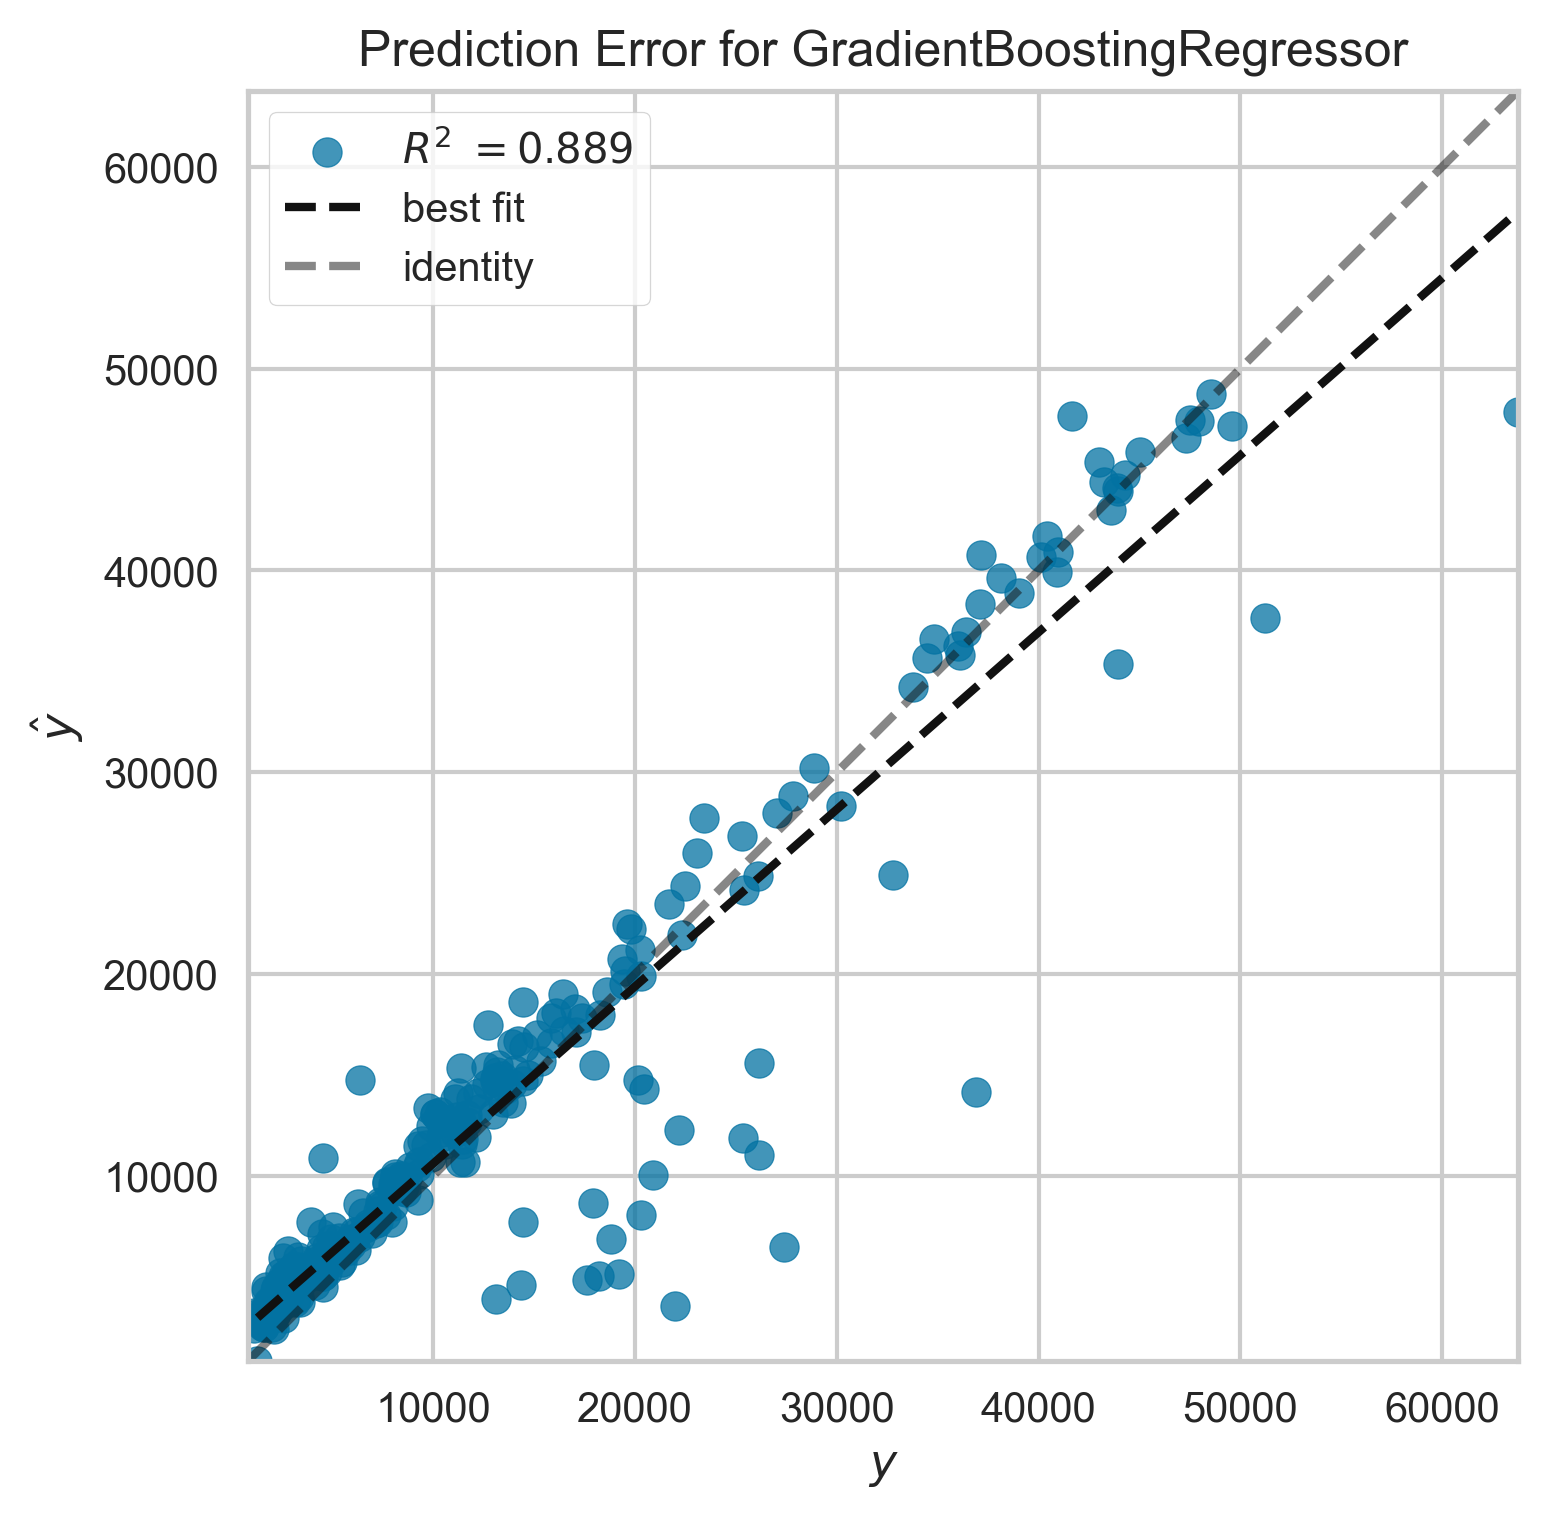

In [ ]:
plot_model(model, 'error')

# Завершение и сохранение модели

In [ ]:
final_model = finalize_model(tuned_model)

save_model(final_model, 'regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['smoker', 'sex', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['smoker', 'sex'],
                                     transfor...
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', Transform